In [1]:
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
from utils import *
from model import *
from data import *
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path='/home/zhiqin/data/LLM/LLM_new/data_complexity_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini'

random_num_lst=[0,1,5]

seed_lst=[1,2,3,4,5,6,7,8]

L_lst=[2,3,4]

index_all=np.zeros((len(random_num_lst),len(seed_lst),len(L_lst)))

for random_num in random_num_lst:
    for seed in seed_lst:
        for L in L_lst:
            path_new='/home/zhiqin/data/LLM/LLM_new/data_complexity_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_diff_lr_5e-4_composition_task_34_unseen_43_unseen_random_num_%s_diff_ini_0.8_optim_multiplier_10.0/composition_random-N_100000-%sL1H_seed%s/loss/train_loss_his.npy'%(random_num,L,seed)
            loss=np.load(path_new)
            indices = np.where(loss < 1e-1)[0]
            if len(indices)>0:
                index_all[random_num_lst.index(random_num),seed_lst.index(seed),L_lst.index(L)]=indices[0]
            # else:
            #     index_all[random_num_lst.index(random_num),seed_lst.index(seed),L_lst.index(L)]=100000

            

In [8]:

condense_step=np.mean(index_all, axis=1)


In [17]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    plt.rcParams['lines.linewidth'] = lw
    

    plt.rcParams['lines.markersize'] = ms

    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)


    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs

    plt.rcParams['axes.linewidth'] = axlw

    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw

    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len

    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0

    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len

    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False

    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['legend.frameon'] = False

    plt.rcParams['figure.dpi'] = dpi

    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):

    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):

    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


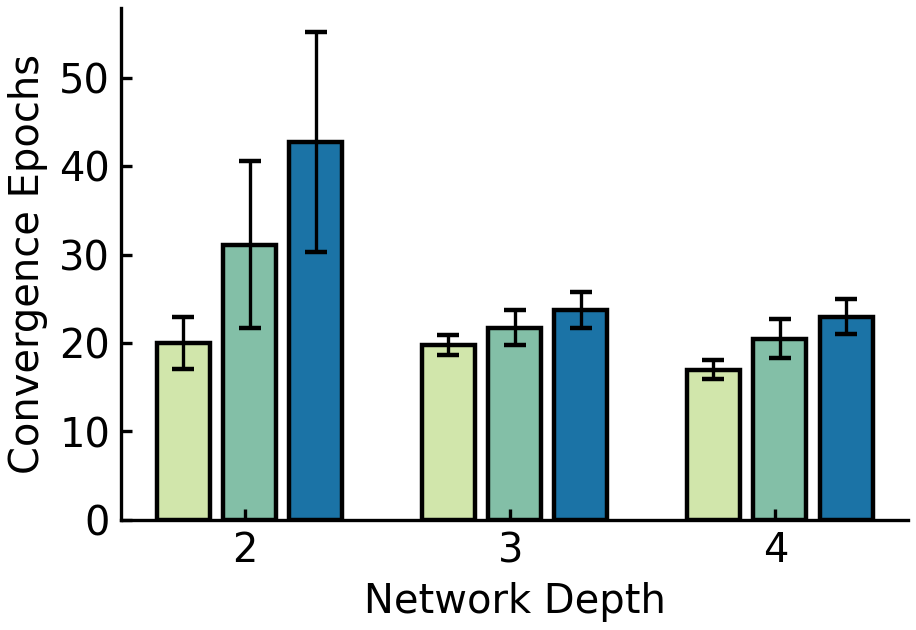

In [18]:
fig = plt.figure(figsize=(12, 8))
format_settings(left=0.12, right=0.94, bottom=0.15, top=0.95, major_tick_len=10, fs=36, lw=6, ms=12.5, axlw=3)
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 5

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

ax = plt.gca()

labels = ['noise group=0', 'noise group=1', 'noise group=5']
scale_color2=0.96
scale_color=0.9

# 定义原始的RGB颜色
color_list = [(218/255*scale_color2, 240/255*scale_color2, 178/255*scale_color2), 
              (146/255*scale_color, 212/255*scale_color, 185/255*scale_color), 
              (30/255*scale_color, 128/255*scale_color, 184/255*scale_color)]
width = 0.15
width2 = 0.12
for i, data in enumerate(condense_step):
    ax.bar(np.arange(len(data))*0.6-0.6*width+i*width, data, width=width2, 
            label=labels[i], color=color_list[i], 
            edgecolor='black', linewidth=4, yerr=np.std(index_all, axis=1)[i,:], capsize=10, error_kw=dict(lw=3, capthick=4))

ax.set_xticks([0.05,0.65,1.25])
# ax.yaxis.grid(True, linestyle='--', linewidth=1.7, color='gray', alpha=0.7)
# ax.set_axisbelow(True)
ax.set_xticks([0.05,0.65,1.25])
ax.set_xticklabels([2,3,4])
# ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
# ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('Network Depth', labelpad=10)
ax.set_ylabel('Convergence Epochs', labelpad=10)

# ax.legend(loc=(0, 1.02), frameon=False, ncol=2)
plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/condense_step.png', dpi=300)
# plt.savefig(f'{exp_dir}/compare_context.png', dpi=300)
# print(f'saved at {exp_dir}/compare_context.png')